In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV,validation_curve
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.manifold import TSNE

from sklearn.linear_model import RidgeCV


import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('fifa.csv', index_col = 'name')

In [13]:
data.head()

,position,age,height,league_rank,average_market_value,highest_market_value,team_fifa_points,total_played_minutes,average_minutes_played,average_assists_per_game,total_assists,assist_per_minute,average_goals_per_game,total_goals,goals_per_minute,total_yellow_cards,team_win_ratio,overall,data_year
name,,,,,,,,,,,,,,,,,,,
James Milner,Midfield,34,175,1,8.833333e+06,12000000.0,134.0,1404,43.875000,0.093750,3,0.002137,0.0625,2,0.001425,7,0.787234,80.0,2021
Zlatan Ibrahimović,Attack,38,195,4,3.150000e+06,3500000.0,38.0,810,81.000000,0.100000,1,0.001235,0.4000,4,0.004938,3,0.437500,83.0,2021
Hilton,Defender,42,180,5,1.000000e+05,100000.0,0.0,2511,89.678571,0.071429,2,0.000796,0.0000,0,0.000000,2,0.392857,77.0,2021
Niklas Moisander,Defender,34,183,2,1.350000e+06,1500000.0,0.0,2250,90.000000,0.040000,1,0.000444,0.0400,1,0.000444,6,0.289474,75.0,2021
Gianluigi Buffon,Goalkeeper,42,192,4,1.000000e+06,1000000.0,107.0,1170,90.000000,0.000000,0,0.000000,0.0000,0,0.000000,0,0.714286,82.0,2021


In [25]:
data.shape

(5978, 19)

In [14]:
forwards =  data[data['position'] == 'Attack']

In [27]:
forwards.shape

(1648, 19)

In [15]:
forwards = forwards.drop(['position', 'data_year','position'], axis = 1)

In [16]:
# Define the features (X) and target (y)
X = forwards.drop('overall', axis=1)
y = forwards['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

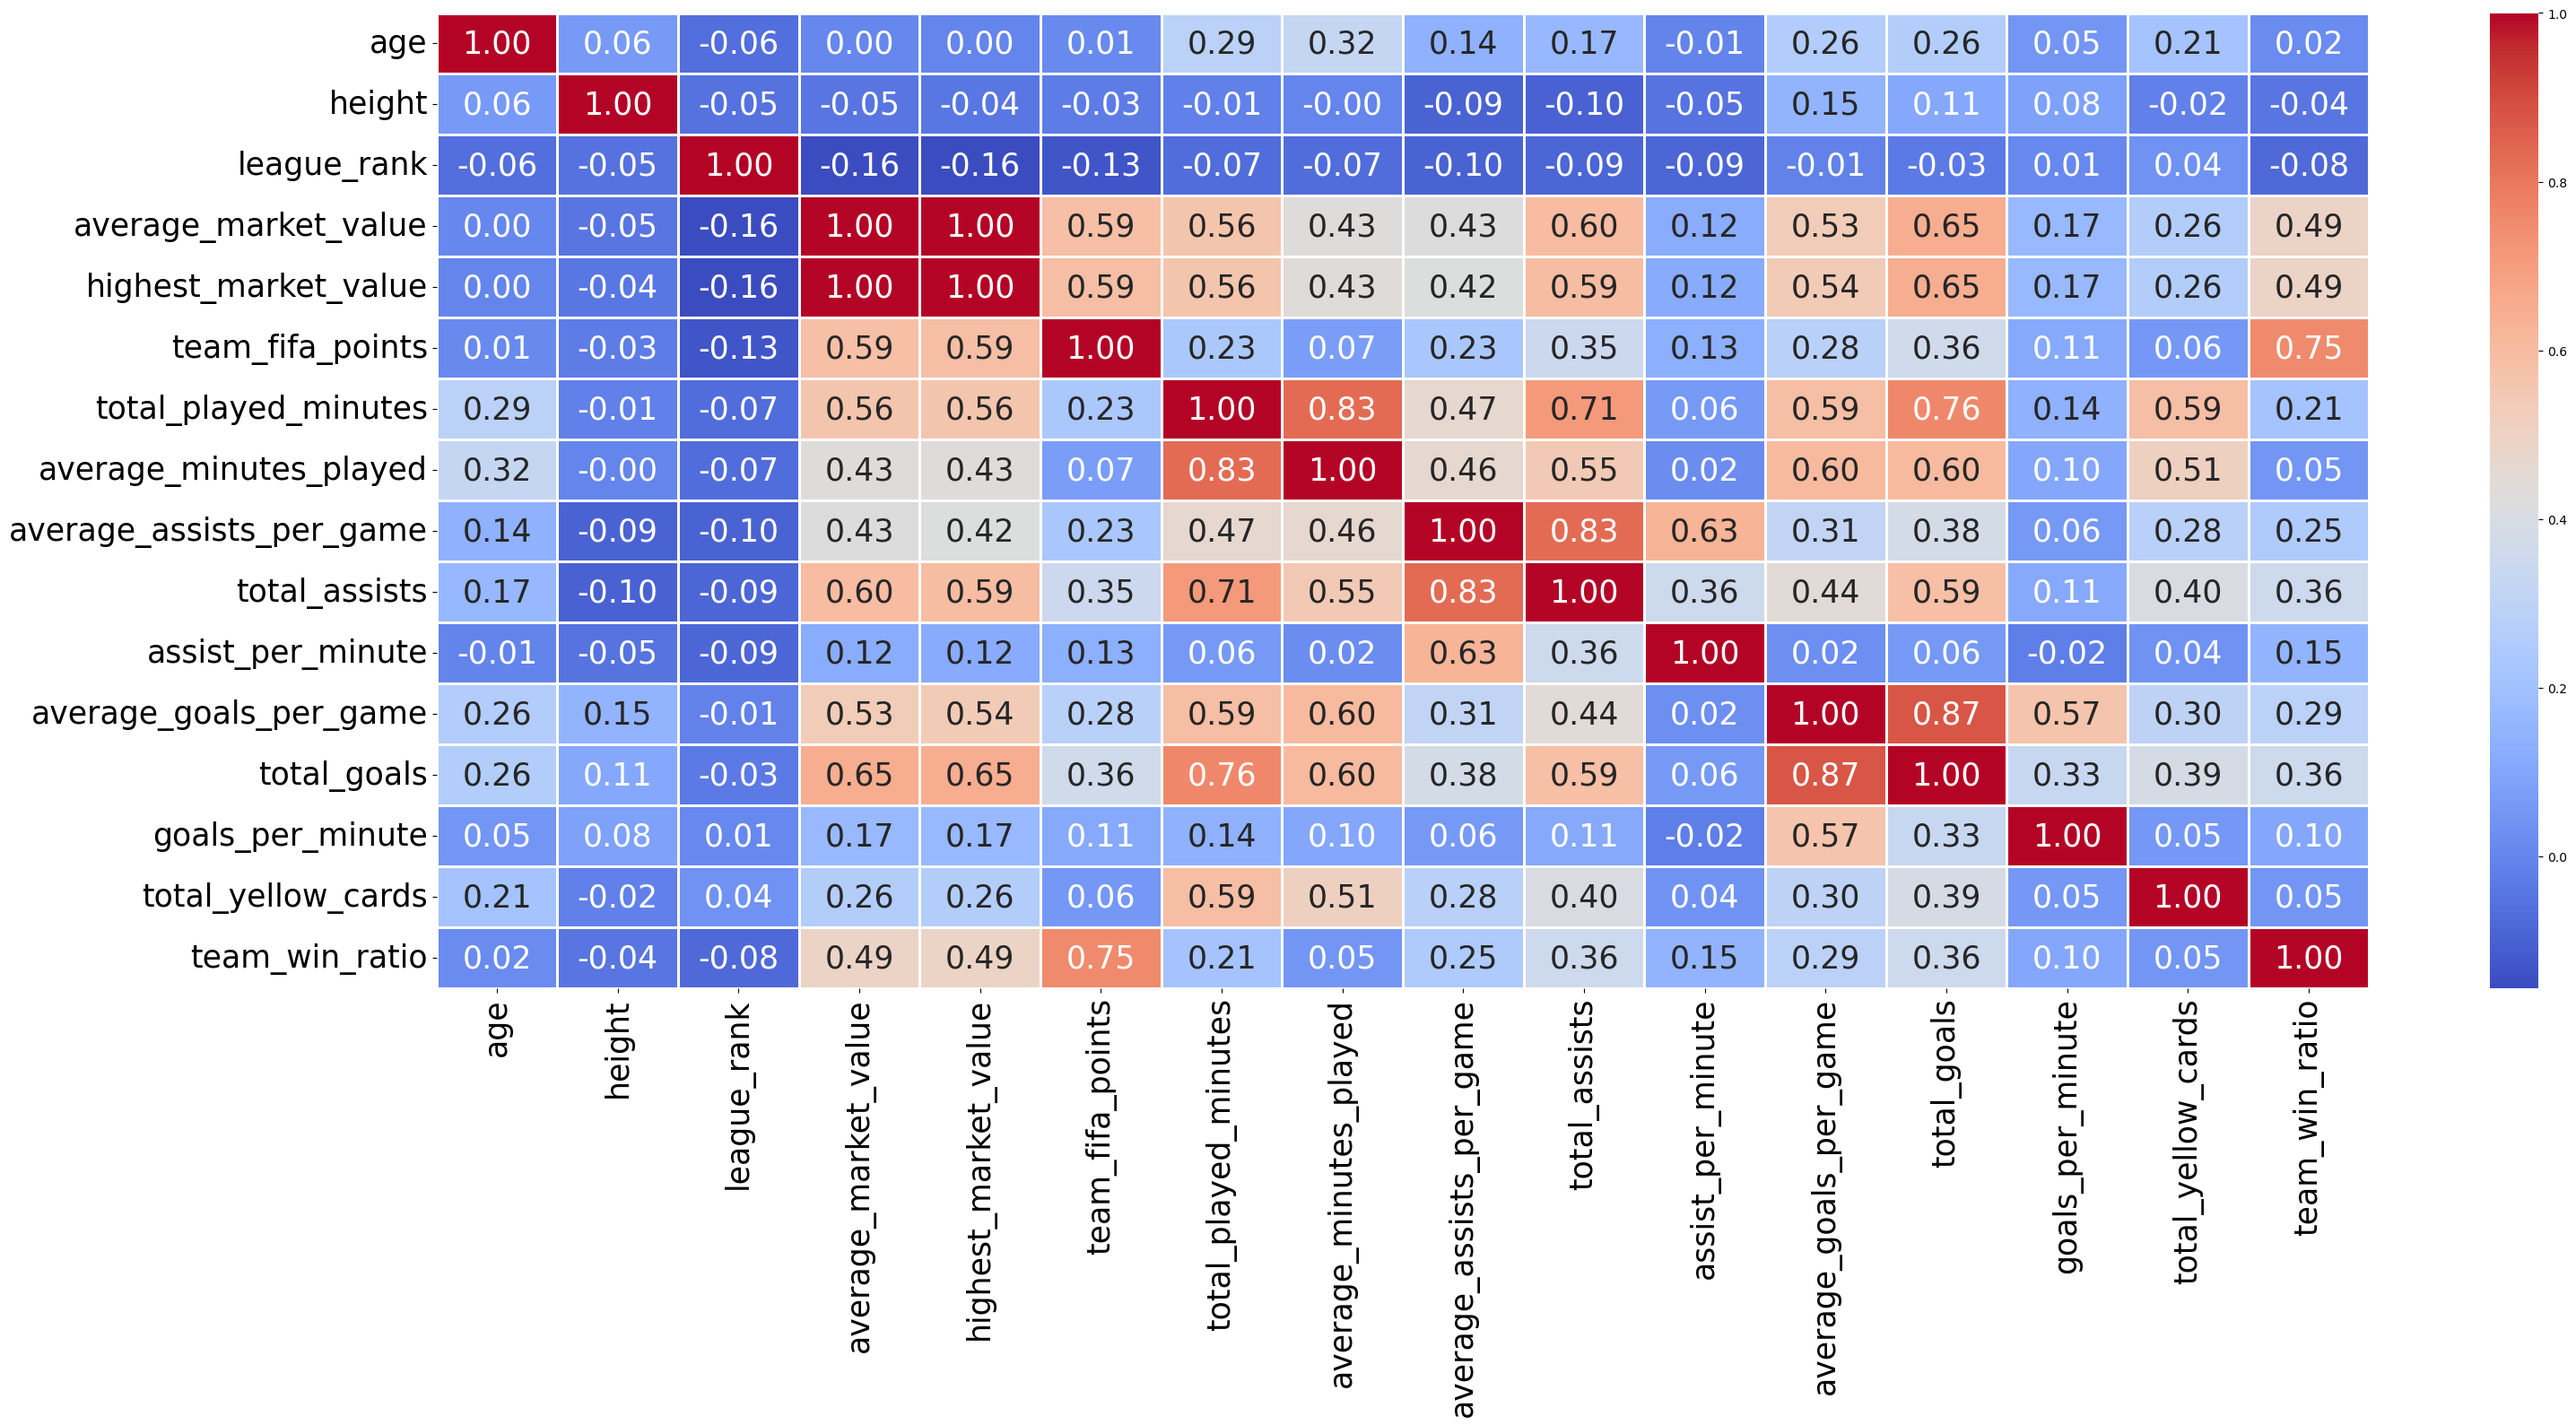

In [30]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap
plt.figure(figsize=(32, 16))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2, annot_kws={"size": 25}, fmt=".2f")

# Increase font size for feature names on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=25)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=25)

plt.tight_layout()

plt.savefig('correlation.png')

In [39]:
def categorize_overall(overall):
    if 90 <= overall <= 99:
        return '90+'
    elif 80 <= overall <= 89:
        return '80+'
    elif 70 <= overall <= 79:
        return '70+'
    elif 60 <= overall <= 69:
        return '60+'
    elif 50 <= overall <= 59:
        return '50+'
    else:
        return '50-'



In [40]:
# Apply the function to create a new column
forwards['type'] = forwards['overall'].apply(categorize_overall)
forwards = forwards.reset_index()


In [41]:
forwards_pca = forwards.drop(['name'], axis = 1)

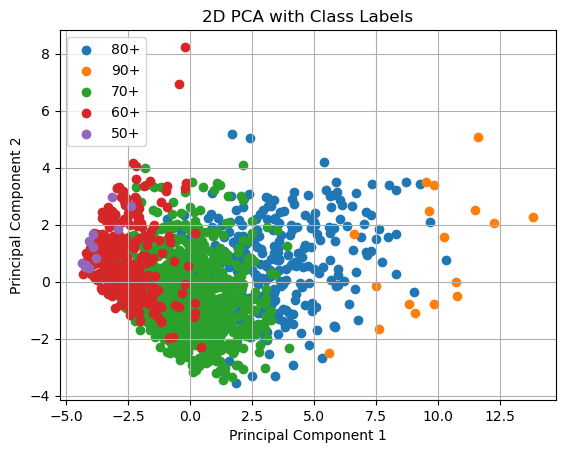

In [42]:
# Separate features and class labels
features = forwards_pca.drop(['type'], axis=1)
labels = forwards_pca['type']

# Standardize the features (important for PCA)
features = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with class labels
final_df = pd.concat([principal_df, labels], axis=1)

# Plotting
fig, ax = plt.subplots()
for label in final_df['type'].unique():
    indices_to_keep = final_df['type'] == label
    ax.scatter(final_df.loc[indices_to_keep, 'PC1'], 
               final_df.loc[indices_to_keep, 'PC2'], 
               label=label)
ax.legend()
ax.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA with Class Labels')
plt.show()

/Users/mustafaocak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mustafaocak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


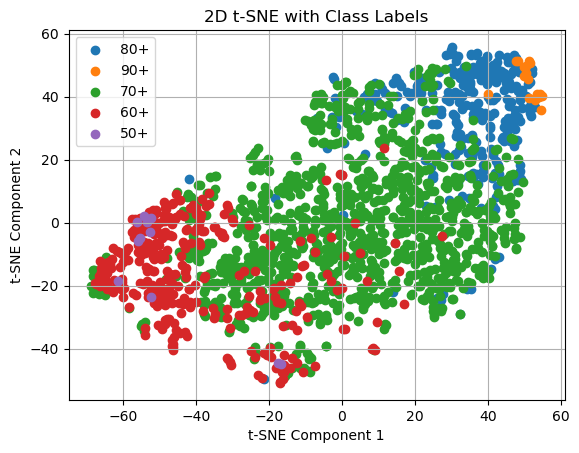

In [48]:
# Apply t-SNE
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

# Concatenate with class labels
final_df = pd.concat([tsne_df, labels], axis=1)

# Plotting
fig, ax = plt.subplots()
for label in final_df['type'].unique():
    indices_to_keep = final_df['type'] == label
    ax.scatter(final_df.loc[indices_to_keep, 'TSNE1'], 
               final_df.loc[indices_to_keep, 'TSNE2'], 
               label=label)
ax.legend()
ax.grid()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE with Class Labels')
plt.show()

In [49]:
data..head()

,position,age,height,league_rank,average_market_value,highest_market_value,team_fifa_points,total_played_minutes,average_minutes_played,average_assists_per_game,total_assists,assist_per_minute,average_goals_per_game,total_goals,goals_per_minute,total_yellow_cards,team_win_ratio,overall,data_year
name,,,,,,,,,,,,,,,,,,,
James Milner,Midfield,34,175,1,8.833333e+06,12000000.0,134.0,1404,43.875000,0.093750,3,0.002137,0.0625,2,0.001425,7,0.787234,80.0,2021
Zlatan Ibrahimović,Attack,38,195,4,3.150000e+06,3500000.0,38.0,810,81.000000,0.100000,1,0.001235,0.4000,4,0.004938,3,0.437500,83.0,2021
Hilton,Defender,42,180,5,1.000000e+05,100000.0,0.0,2511,89.678571,0.071429,2,0.000796,0.0000,0,0.000000,2,0.392857,77.0,2021
Niklas Moisander,Defender,34,183,2,1.350000e+06,1500000.0,0.0,2250,90.000000,0.040000,1,0.000444,0.0400,1,0.000444,6,0.289474,75.0,2021
Gianluigi Buffon,Goalkeeper,42,192,4,1.000000e+06,1000000.0,107.0,1170,90.000000,0.000000,0,0.000000,0.0000,0,0.000000,0,0.714286,82.0,2021


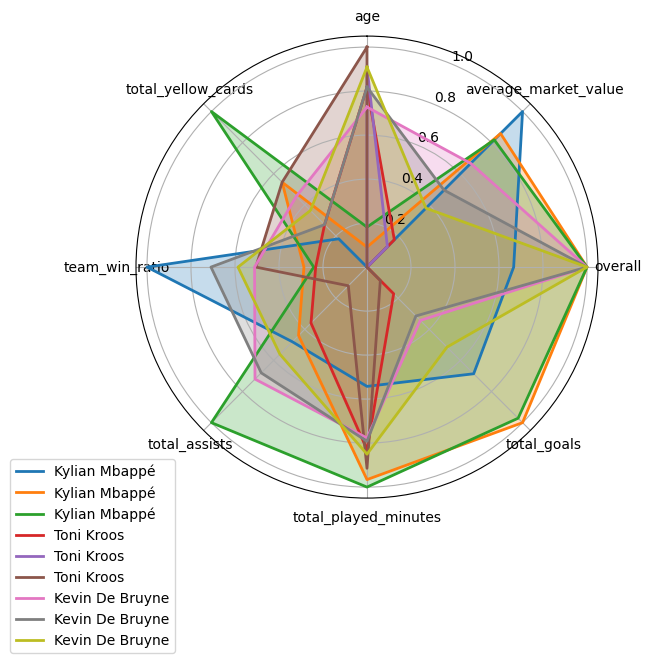

In [18]:
from math import pi
# Select Players and Attributes for Comparison
# Replace these player identifiers with actual ones from your dataset
selected_players = ['Kylian Mbappé', 'Toni Kroos', 'Kevin De Bruyne']  # Update with real player identifiers
attributes = ['age','average_market_value','overall','total_goals','total_played_minutes', 'total_assists', 'team_win_ratio', 'total_yellow_cards']  # Update with your attributes

# Extract and Normalize Data for Selected Players
data_filtered = data.loc[selected_players, attributes]
data_normalized = data_filtered.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Number of variables we're plotting
num_vars = len(attributes)

# Split the circle into even parts and save angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Radar chart plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for idx, row in data_normalized.iterrows():
    ax.plot(angles, row.tolist() + row.tolist()[:1], linestyle='solid', linewidth=2, label=idx)
    ax.fill(angles, row.tolist() + row.tolist()[:1], alpha=0.25)

# Labels for each point
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], attributes)

# Add legend and show plot
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

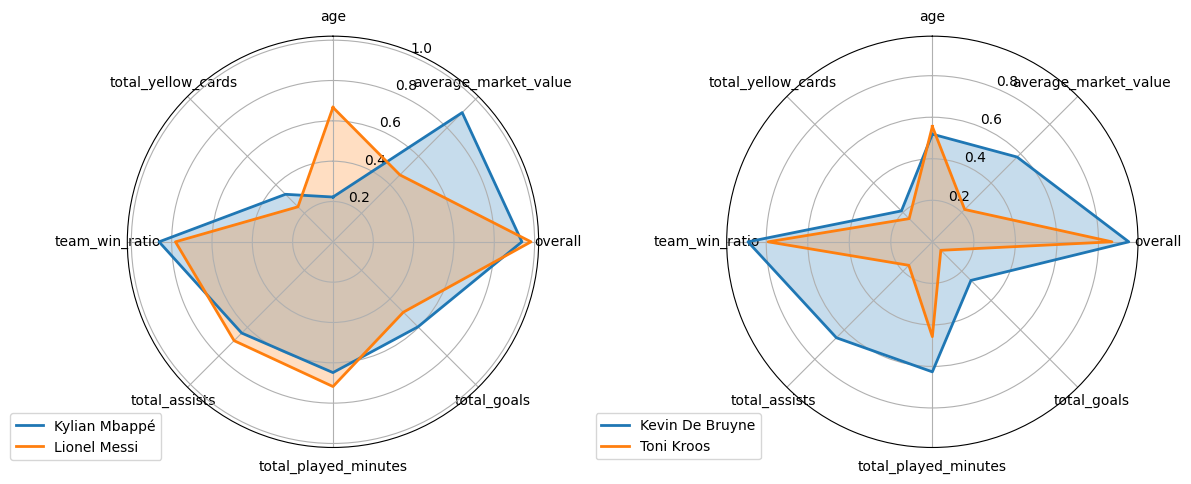

In [19]:
# Assuming 'data' is your DataFrame
attributes = ['age', 'average_market_value', 'overall', 'total_goals', 'total_played_minutes', 'total_assists', 'team_win_ratio', 'total_yellow_cards']

# Number of variables we're plotting
num_vars = len(attributes)
def create_radar_chart(players, ax, data_to_normalize):
    # Filter data for the selected players and take the average for each player
    data_filtered = data_to_normalize.loc[players].groupby(level=0).mean()

    # Normalize the data based on the overall data range
    data_normalized = (data_filtered - data_to_normalize.min()) / (data_to_normalize.max() - data_to_normalize.min())

    # Split the circle into even parts and save angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Plot each player's data
    for idx, row in data_normalized.iterrows():
        ax.plot(angles, row.tolist() + row.tolist()[:1], linestyle='solid', linewidth=2, label=idx)
        ax.fill(angles, row.tolist() + row.tolist()[:1], alpha=0.25)

    # Set labels and format plot
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Calculate the global min and max values for normalization
overall_min = data[attributes].min()
overall_max = data[attributes].max()
data_to_normalize = (data[attributes] - overall_min) / (overall_max - overall_min)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(polar=True))

# Compare Kylian Mbappé and Lionel Messi
create_radar_chart(['Kylian Mbappé', 'Lionel Messi'], ax1, data_to_normalize)

# Compare Toni Kroos and Kevin De Bruyne
create_radar_chart(['Toni Kroos', 'Kevin De Bruyne'], ax2, data_to_normalize)

plt.tight_layout()
plt.show()

In [60]:
# Create a Random Forest Regressor
# rf_model = RandomForestRegressor(random_state=45)
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2 ,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# # Get feature importances from the trained model
# feature_importances = rf_model.feature_importances_

# # Get the indices of features sorted by importance in descending order
# indices = np.argsort(feature_importances)[::-1]

# # Get the feature names
# feature_names = X_train.columns  # Replace X with your actual feature matrix

# # Plot the horizontal bar plot for feature importances
# plt.figure(figsize=(10, 10))
# plt.barh(range(X.shape[1]), feature_importances[indices], align="center")
# plt.yticks(range(X.shape[1]), feature_names[indices])
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.title("Random Forest Feature Importance (Horizontal Bar)")
# plt.tight_layout()

# plt.savefig('feature_importance_forest')

# Create a DataFrame with player names, predicted overall, and real overall
results_df = pd.DataFrame({
    'Predicted Overall': y_pred,
    'Real Overall': y_test
})

mae = mean_absolute_error(results_df['Real Overall'], results_df['Predicted Overall'])
print(f'Mean Absolute Error (MAE): {mae}')

# Display the results DataFrame
results_df = results_df.sort_values(by='Real Overall', ascending=False).reset_index()
middle_rows = len(results_df) // 2  # Calculate the middle index
(results_df.iloc[middle_rows - 5: middle_rows + 5])
# # Calculate R2 score
# r2 = r2_score(y_test, y_pred)

# print(f'R2 Score: {r2}')
# # Get feature importances from the trained model
# feature_importances = rf_model.feature_importances_

# # Get the indices of features sorted by importance in descending order
# indices = np.argsort(feature_importances)[::-1]

# # Get the feature names
# feature_names = X.columns  # Replace X with your actual feature matrix

# # Plot the horizontal bar plot for feature importances
# plt.figure(figsize=(10, 10))
# plt.barh(range(X.shape[1]), feature_importances[indices], align="center")
# plt.yticks(range(X.shape[1]), feature_names[indices])
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.title("Random Forest Feature Importance (Horizontal Bar)")
# plt.tight_layout()

# plt.savefig('feature_importance_forest')



R2 Score: 0.8957344556255404
Mean Absolute Error (MAE): 1.6089848484848486


,name,Predicted Overall,Real Overall
160,Florian Kainz,72.785,75.0
161,Mama Baldé,73.990,75.0
162,Vedat Muriqi,75.305,75.0
163,Opa Nguette,73.540,75.0
164,Ibrahima Traoré,71.635,75.0
165,Eldor Shomurodov,77.115,75.0
166,Maxwel Cornet,77.725,75.0
167,Romain Hamouma,74.535,75.0
168,Admir Mehmedi,75.600,74.0
169,Christian Benteke,74.185,74.0


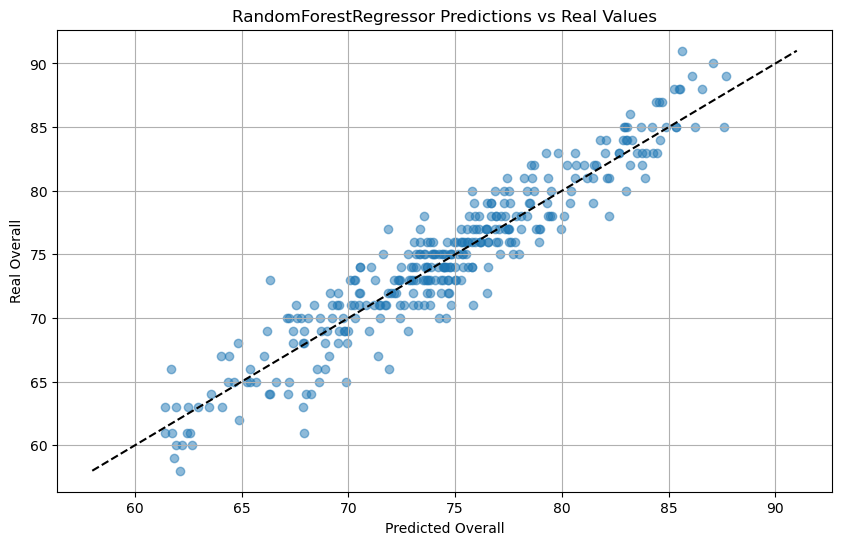

In [59]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Predicted Overall'], results_df['Real Overall'], alpha=0.5)

# Adding the x = y line
plt.plot([results_df['Real Overall'].min(), results_df['Real Overall'].max()], 
         [results_df['Real Overall'].min(), results_df['Real Overall'].max()], 
         color='black', linestyle='--')

plt.title('RandomForestRegressor Predictions vs Real Values')
plt.xlabel('Predicted Overall')
plt.ylabel('Real Overall')
plt.grid(True)
plt.show()

In [239]:
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2 ,random_state=1)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

results_df = pd.DataFrame({
    'Predicted Overall': y_pred,
    'Real Overall': y_test
})

mae = mean_absolute_error(results_df['Real Overall'], results_df['Predicted Overall'])
print(f'Mean Absolute Error (MAE): {mae}')

# Display the results DataFrame
results_df = results_df.sort_values(by='Real Overall', ascending=False).reset_index()
middle_rows = len(results_df) // 2  # Calculate the middle index
(results_df.iloc[middle_rows - 5: middle_rows + 5])

R2 Score: 0.8974890204526679
Mean Absolute Error (MAE): 1.5927878787878789


,name,Predicted Overall,Real Overall
160,Florian Kainz,73.005,75.0
161,Mama Baldé,74.085,75.0
162,Vedat Muriqi,74.970,75.0
163,Opa Nguette,73.485,75.0
164,Ibrahima Traoré,71.545,75.0
165,Eldor Shomurodov,76.980,75.0
166,Maxwel Cornet,77.350,75.0
167,Romain Hamouma,74.895,75.0
168,Admir Mehmedi,75.520,74.0
169,Christian Benteke,74.385,74.0


In [233]:
X_test.to_csv('X_test')
y_test.to_csv('y_test')

In [238]:
asss =pd.read_csv('y_test', index_col = 'name')
asss['overall']

name
Félix Correia                66.0
Paulo Dybala                 86.0
Pierre-Emerick Aubameyang    85.0
Kaio Jorge                   71.0
Ángel Correa                 82.0
                             ... 
Dwight Gayle                 72.0
Yannick Carrasco             85.0
Nemanja Radonjić             74.0
Charles                      71.0
Chadrac Akolo                72.0
Name: overall, Length: 330, dtype: float64

In [237]:
y_test

name
Félix Correia                66.0
Paulo Dybala                 86.0
Pierre-Emerick Aubameyang    85.0
Kaio Jorge                   71.0
Ángel Correa                 82.0
                             ... 
Dwight Gayle                 72.0
Yannick Carrasco             85.0
Nemanja Radonjić             74.0
Charles                      71.0
Chadrac Akolo                72.0
Name: overall, Length: 330, dtype: float64

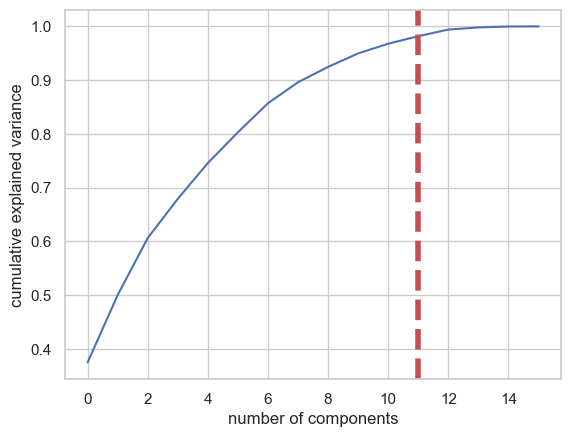

In [61]:
pca_test = PCA(n_components=16)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=11, ymin=0, ymax=1)
plt.savefig('pca_variance.png', dpi=300)


evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr


In [62]:
pca = PCA(n_components=11)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [63]:
rfc = RandomForestRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=1, random_state=45)
rfc.fit(X_train_scaled_pca, y_train)

y_pred = rfc.predict(X_test_scaled_pca)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'R2 Score: {r2}')
print(f'Mean Absolute Score: {mae}')

# wont use PCA loss info

R2 Score: 0.8467864741233991
Mean Absolute Score: 1.9070505050505049


In [64]:
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

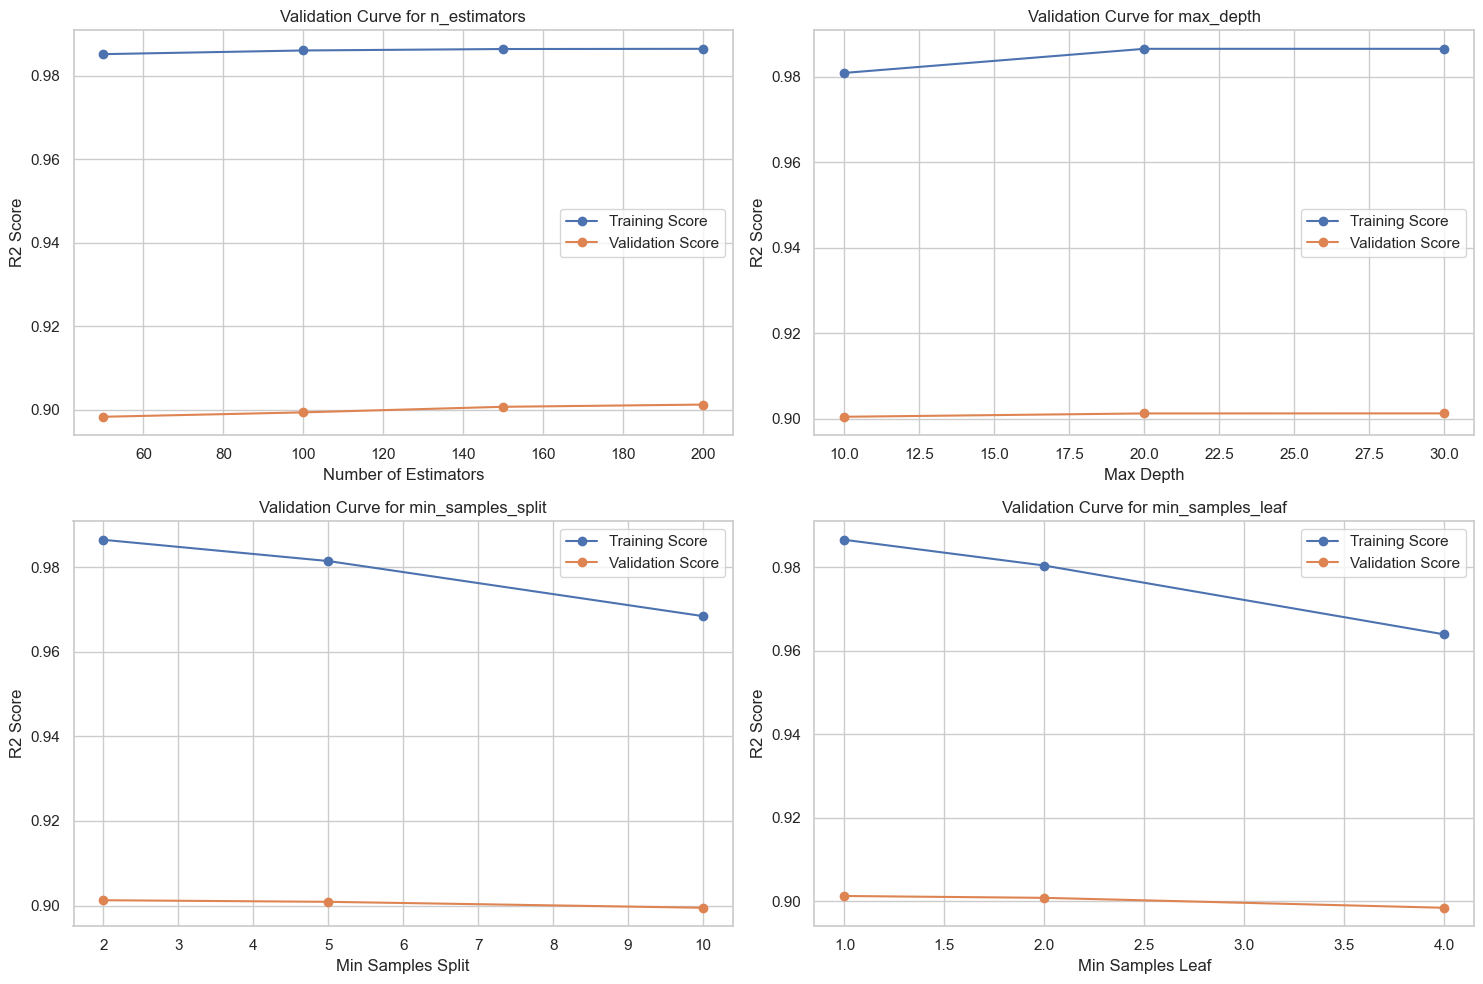

In [158]:
# Plot the validation curve for 'n_estimators'
param_range_estimators = np.arange(50, 201, 50)
train_scores_estimators, test_scores_estimators = validation_curve(
    RandomForestRegressor(random_state=42, max_depth=grid_search.best_params_['max_depth'],
                          min_samples_split=grid_search.best_params_['min_samples_split'],
                          min_samples_leaf=grid_search.best_params_['min_samples_leaf']),
    X_train_scaled, y_train, param_name='n_estimators', param_range=param_range_estimators, cv=5, scoring='r2', n_jobs=-1
)

# Plot the validation curve for 'max_depth'
param_range_depth = [None, 10, 20, 30]
train_scores_depth, test_scores_depth = validation_curve(
    RandomForestRegressor(random_state=42, n_estimators=grid_search.best_params_['n_estimators'],
                          min_samples_split=grid_search.best_params_['min_samples_split'],
                          min_samples_leaf=grid_search.best_params_['min_samples_leaf']),
    X_train_scaled, y_train, param_name='max_depth', param_range=param_range_depth, cv=5, scoring='r2', n_jobs=-1
)

# Plot the validation curve for 'min_samples_split'
param_range_split = [2, 5, 10]
train_scores_split, test_scores_split = validation_curve(
    RandomForestRegressor(random_state=42, n_estimators=grid_search.best_params_['n_estimators'],
                          max_depth=grid_search.best_params_['max_depth'],
                          min_samples_leaf=grid_search.best_params_['min_samples_leaf']),
    X_train_scaled, y_train, param_name='min_samples_split', param_range=param_range_split, cv=5, scoring='r2', n_jobs=-1
)

# Plot the validation curve for 'min_samples_leaf'
param_range_leaf = [1, 2, 4]
train_scores_leaf, test_scores_leaf = validation_curve(
    RandomForestRegressor(random_state=42, n_estimators=grid_search.best_params_['n_estimators'],
                          max_depth=grid_search.best_params_['max_depth'],
                          min_samples_split=grid_search.best_params_['min_samples_split']),
    X_train_scaled, y_train, param_name='min_samples_leaf', param_range=param_range_leaf, cv=5, scoring='r2', n_jobs=-1
)

# Plot the validation curves
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(param_range_estimators, np.mean(train_scores_estimators, axis=1), label='Training Score', marker='o')
plt.plot(param_range_estimators, np.mean(test_scores_estimators, axis=1), label='Validation Score', marker='o')
plt.title('Validation Curve for n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(param_range_depth, np.mean(train_scores_depth, axis=1), label='Training Score', marker='o')
plt.plot(param_range_depth, np.mean(test_scores_depth, axis=1), label='Validation Score', marker='o')
plt.title('Validation Curve for max_depth')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(param_range_split, np.mean(train_scores_split, axis=1), label='Training Score', marker='o')
plt.plot(param_range_split, np.mean(test_scores_split, axis=1), label='Validation Score', marker='o')
plt.title('Validation Curve for min_samples_split')
plt.xlabel('Min Samples Split')
plt.ylabel('R2 Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(param_range_leaf, np.mean(train_scores_leaf, axis=1), label='Training Score', marker='o')
plt.plot(param_range_leaf, np.mean(test_scores_leaf, axis=1), label='Validation Score', marker='o')
plt.title('Validation Curve for min_samples_leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()

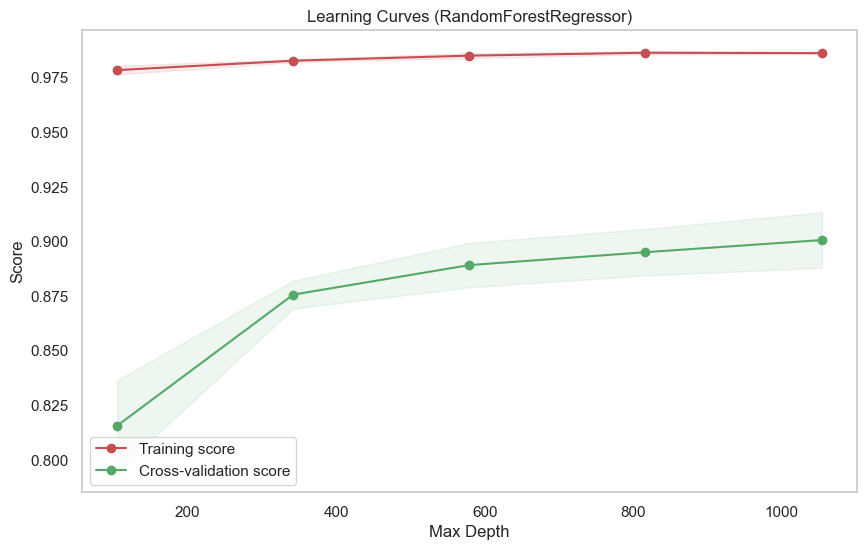

In [65]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Max Depth")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot the learning curve
cv = 5  # Cross-validation splitting strategy
title = "Learning Curves (RandomForestRegressor)"
model = RandomForestRegressor(n_estimators=120, random_state=1)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

In [ ]:
# Vary the max_depth hyperparameter to see its effect on error
max_depth_values = range(1, 21)
train_errors = []
val_errors = []

for max_depth in max_depth_values:
    # Initialize and train the Random Forest Regressor model with varying max_depth
    rf_model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_train_pred = rf_model.predict(X_train_scaled)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_test_scaled)
    val_error = mean_squared_error(y_test, y_val_pred)
    val_errors.append(val_error)

# Plot the errors against the model complexity
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, label='Training Error', marker='o')
plt.plot(max_depth_values, val_errors, label='Validation Error', marker='o')
plt.xlabel('Max Depth (Model Complexity)')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Model Complexity vs. Error')
plt.legend()
plt.show()

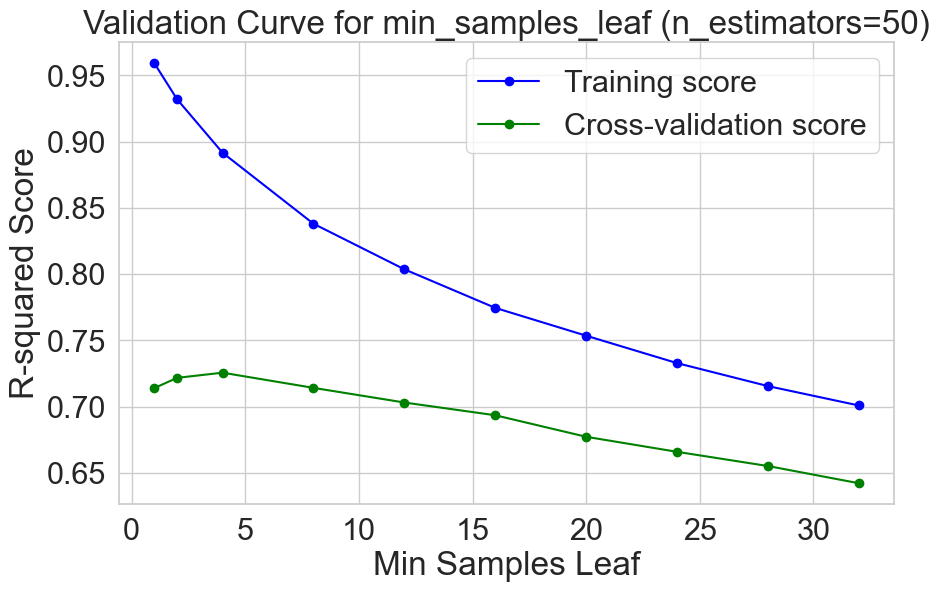

In [118]:
# Define hyperparameters to tune
param_grid = {
    'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20, 24, 28, 32]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, return_train_score=True, scoring='r2')

# Your data (X_train, y_train) and fitting the model go here

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Extract results from the GridSearchCV
results_pv = grid_search.cv_results_

# Get the hyperparameter values and scores
param_values = param_grid['min_samples_leaf']
train_scores_mean = results_pv['mean_train_score']
test_scores_mean = results_pv['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores_mean, label='Training score', color='blue', marker='o')
plt.plot(param_values, test_scores_mean, label='Cross-validation score', color='green', marker='o')
plt.title('Validation Curve for min_samples_leaf (n_estimators=50)')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R-squared Score')  # Using R-squared as the metric
plt.legend(loc='best')
plt.grid(True)
plt.show()


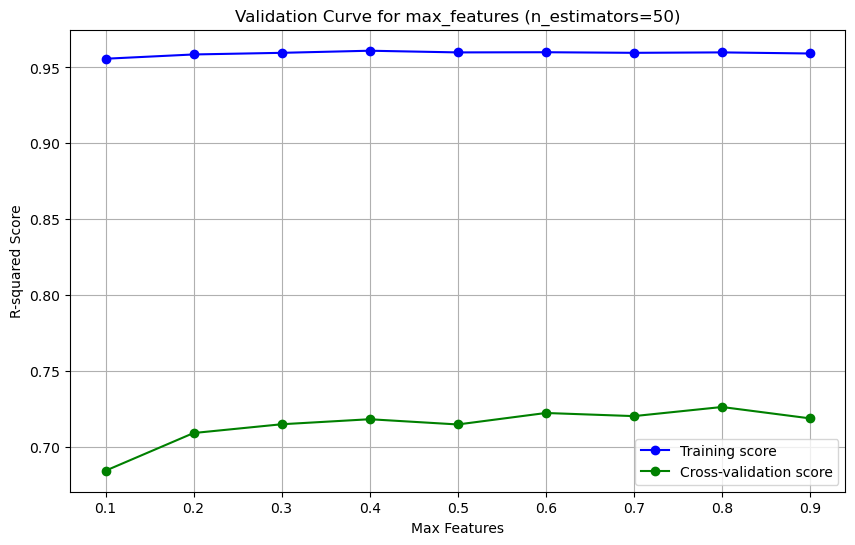

In [113]:
# Define hyperparameters to tune
param_grid = {
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, return_train_score=True, scoring='r2')

# Your data (X_train, y_train) and fitting the model go here

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Extract results from the GridSearchCV
results_pv = grid_search.cv_results_

# Get the hyperparameter values and scores
param_values = param_grid['max_features']
train_scores_mean = results_pv['mean_train_score']
test_scores_mean = results_pv['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores_mean, label='Training score', color='blue', marker='o')
plt.plot(param_values, test_scores_mean, label='Cross-validation score', color='green', marker='o')
plt.title('Validation Curve for max_features (n_estimators=50)')
plt.xlabel('Max Features')
plt.ylabel('R-squared Score')  # Using R-squared as the metric
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [137]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]
max_features = ['log2', 'sqrt',0.1,0.5, 1.0]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 8, num = 8)]
min_samples_split = [2, 5 ,7 , 9]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}





rs = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, random_state=42)

rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 286,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_depth': 8,
 'bootstrap': True}

In [138]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,286,9,2,1.0,8,True,0.726128,1
1,180,5,4,1.0,6,True,0.724999,2
2,446,5,1,1.0,8,True,0.720608,3
3,393,7,1,0.5,8,True,0.716186,4
4,20,5,4,1.0,5,True,0.715999,5
5,500,2,2,0.5,7,False,0.714960,6
6,340,9,4,0.5,5,True,0.713350,7
7,393,2,4,0.5,5,True,0.713304,8
8,126,2,1,1.0,6,True,0.712503,9
9,500,5,4,log2,7,False,0.711455,10


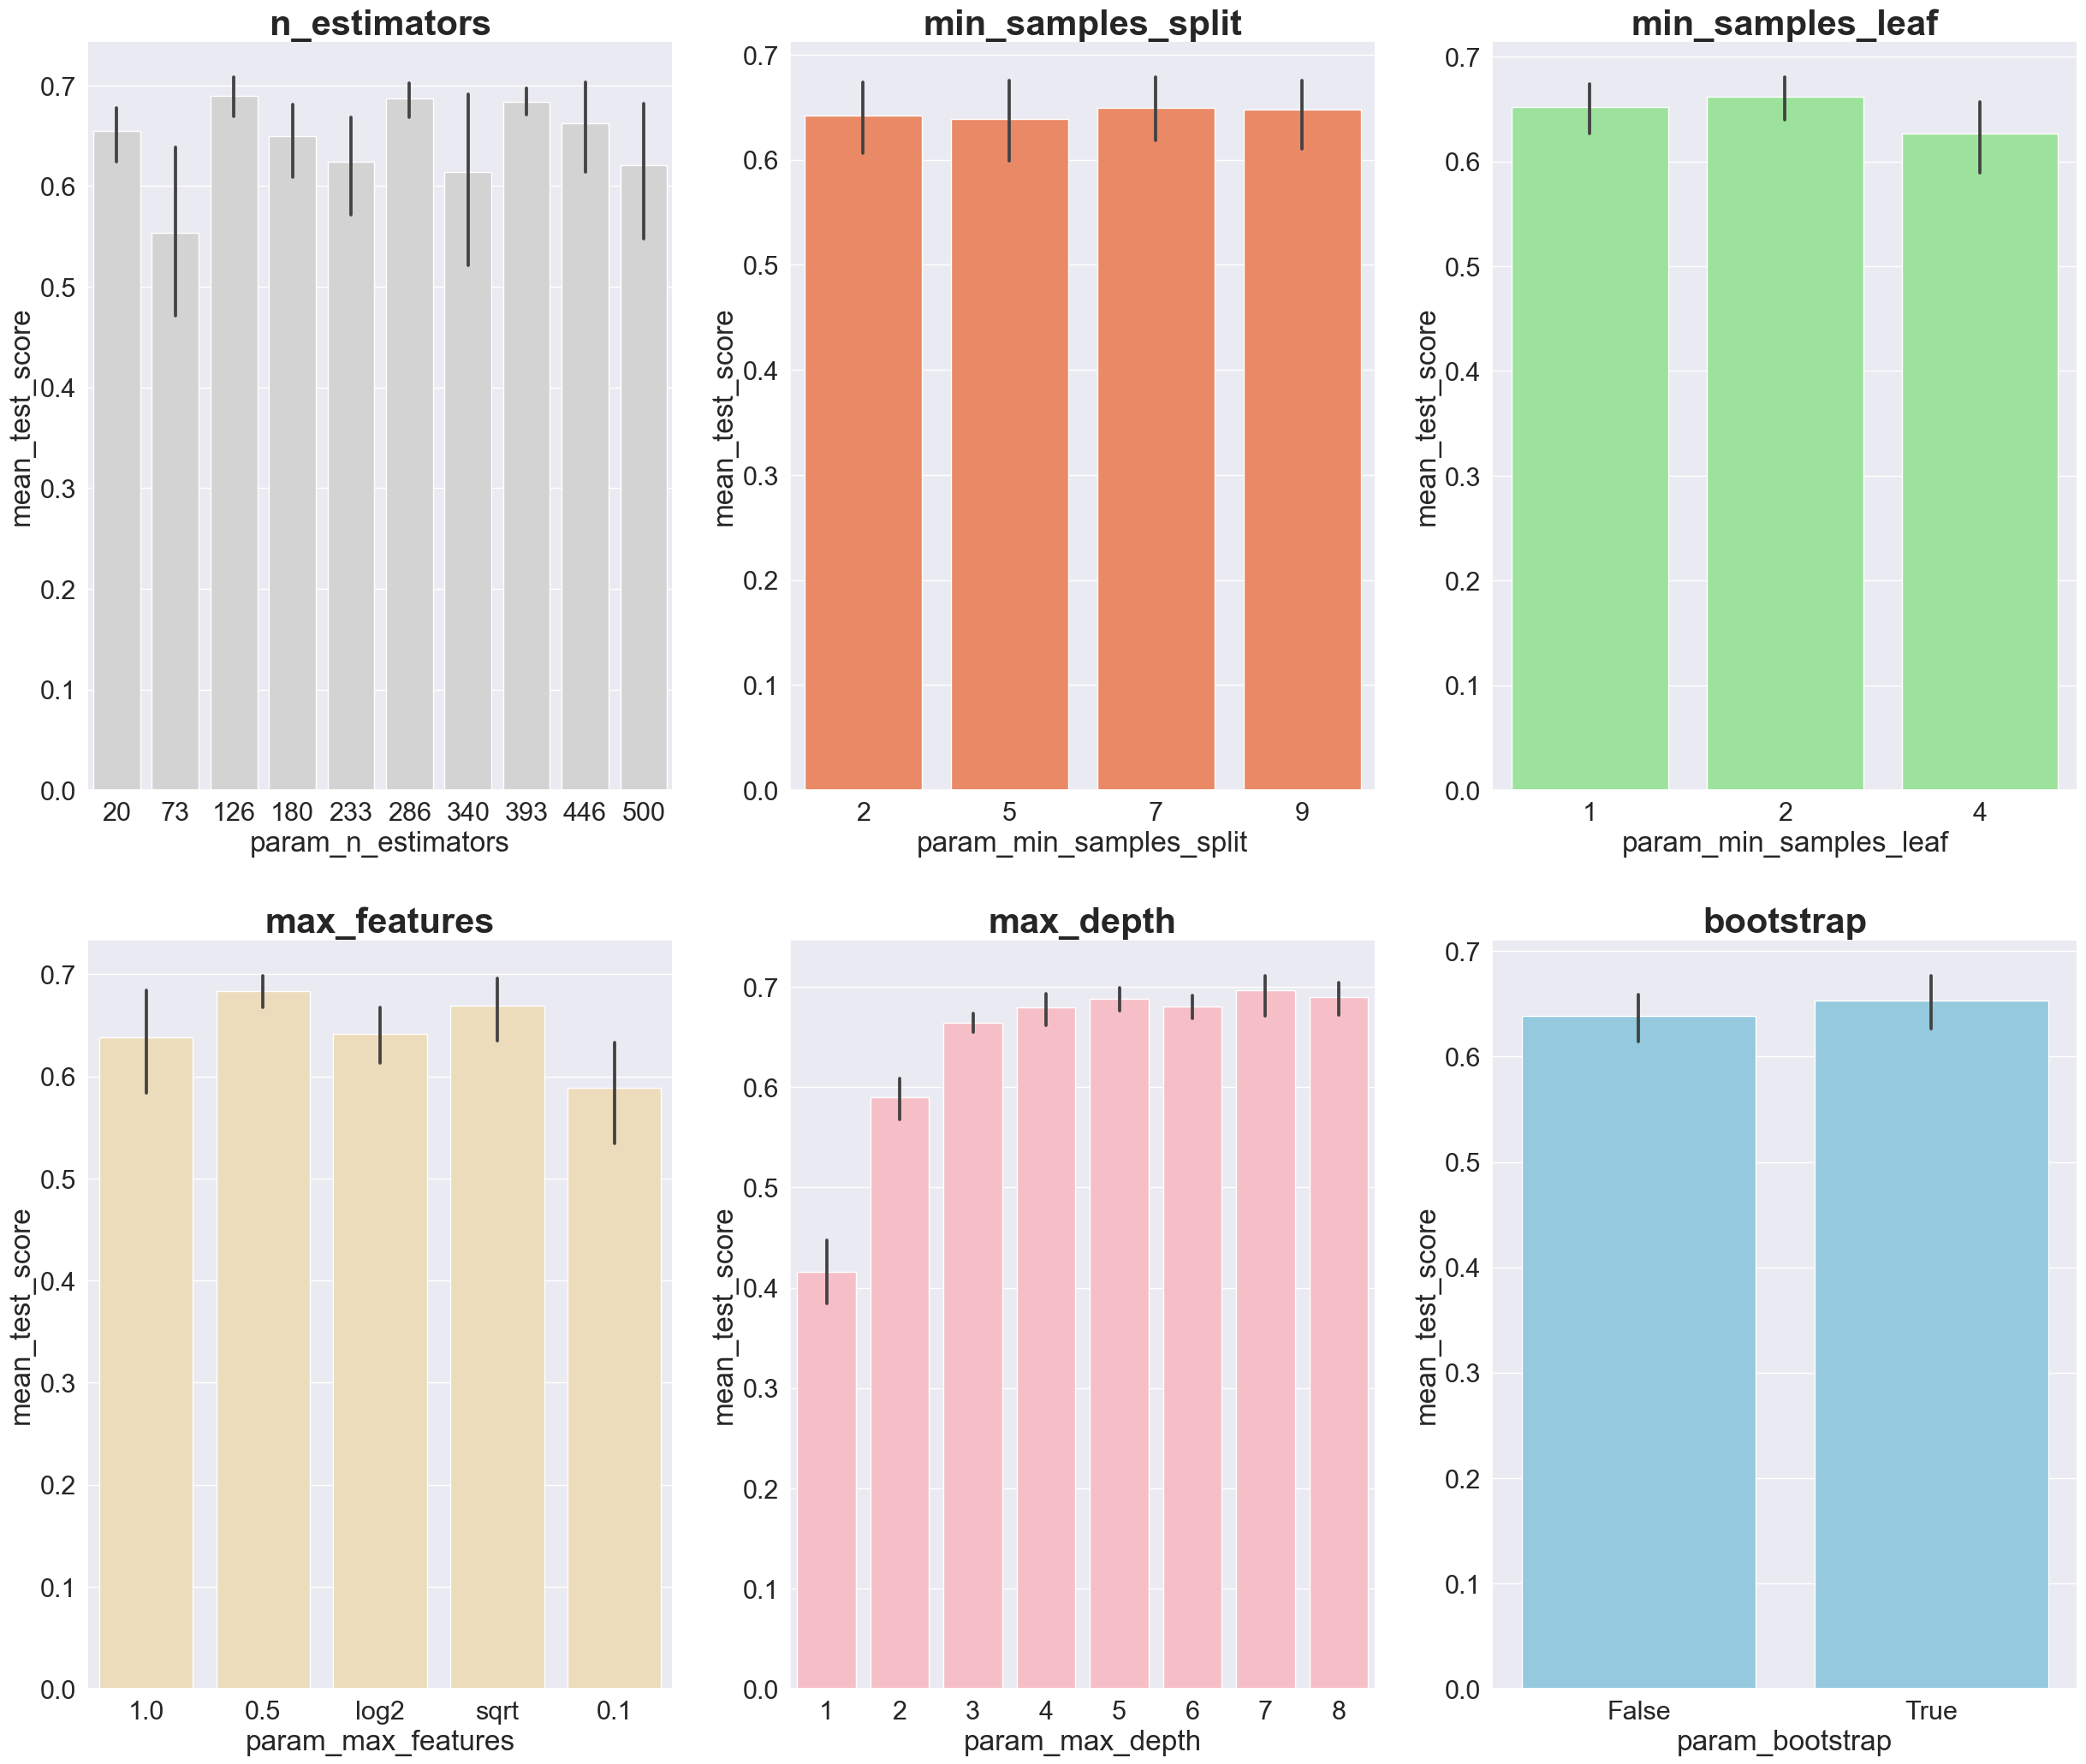

In [141]:
fig, axs = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(30, 25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0, 0], color='lightgrey')
axs[0, 0].set_title(label='n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0, 1], color='coral')
axs[0, 1].set_title(label='min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0, 2], color='lightgreen')
axs[0, 2].set_title(label='min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1, 0], color='wheat')
axs[1, 0].set_title(label='max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1, 1], color='lightpink')
axs[1, 1].set_title(label='max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap', y='mean_test_score', data=rs_df, ax=axs[1, 2], color='skyblue')
axs[1, 2].set_title(label='bootstrap', size=30, weight='bold')

plt.show()


In [74]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor model
model = XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate mean squared error and R-squared
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a dataframe with actual and predicted ranks along with player names
results_df = pd.DataFrame({
    'Player': X_test.index,  # Assuming the player names are the index in X_test
    'Real Overall': y_test,
    'Predicted Overall': y_pred
})

# Print the names, actual ranks, predicted ranks, errors, and score
print(results_df[['Player', 'Real Overall', 'Predicted Overall']])
print(f'Mean Absolute Error: {mse}')
print(f'R-squared: {r2}')

                                              Player  Real Overall  \
name                                                                 
Félix Correia                          Félix Correia          66.0   
Paulo Dybala                            Paulo Dybala          86.0   
Pierre-Emerick Aubameyang  Pierre-Emerick Aubameyang          85.0   
Kaio Jorge                                Kaio Jorge          71.0   
Ángel Correa                            Ángel Correa          82.0   
...                                              ...           ...   
Dwight Gayle                            Dwight Gayle          72.0   
Yannick Carrasco                    Yannick Carrasco          85.0   
Nemanja Radonjić                    Nemanja Radonjić          74.0   
Charles                                      Charles          71.0   
Chadrac Akolo                          Chadrac Akolo          72.0   

                           Predicted Overall  
name                                      

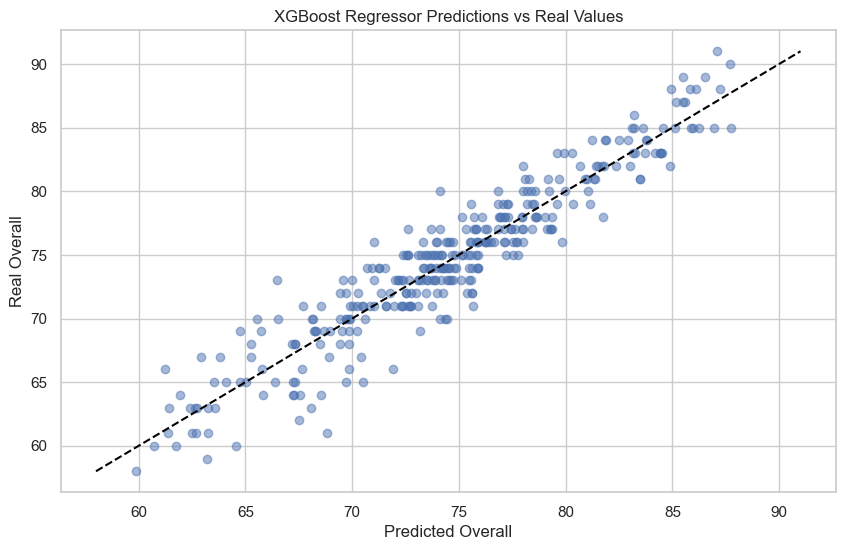

In [75]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Predicted Overall'], results_df['Real Overall'], alpha=0.5)

# Adding the x = y line
plt.plot([results_df['Real Overall'].min(), results_df['Real Overall'].max()], 
         [results_df['Real Overall'].min(), results_df['Real Overall'].max()], 
         color='black', linestyle='--')

plt.title('XGBoost Regressor Predictions vs Real Values')
plt.xlabel('Predicted Overall')
plt.ylabel('Real Overall')
plt.grid(True)
plt.show()

In [23]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

# Create a DataFrame with actual and predicted rankings for XGBoost
results_xgb = pd.DataFrame({'Actual Rank': y_test, 'Predicted Rank (XGBoost)': y_pred_xgb})

# Print the DataFrame for XGBoost
print(results_xgb)

Mean Squared Error (XGBoost): 3.320633721411591
R-squared (XGBoost): 0.9024641070859613
      Actual Rank  Predicted Rank (XGBoost)
1621         75.0                 73.100555
2200         75.0                 75.181313
2399         80.0                 82.936150
1953         73.0                 76.935036
1798         74.0                 73.955231
...           ...                       ...
1804         79.0                 80.223251
1449         95.0                 93.203369
862          78.0                 75.717896
867          74.0                 72.470108
565          74.0                 77.118217

[483 rows x 2 columns]


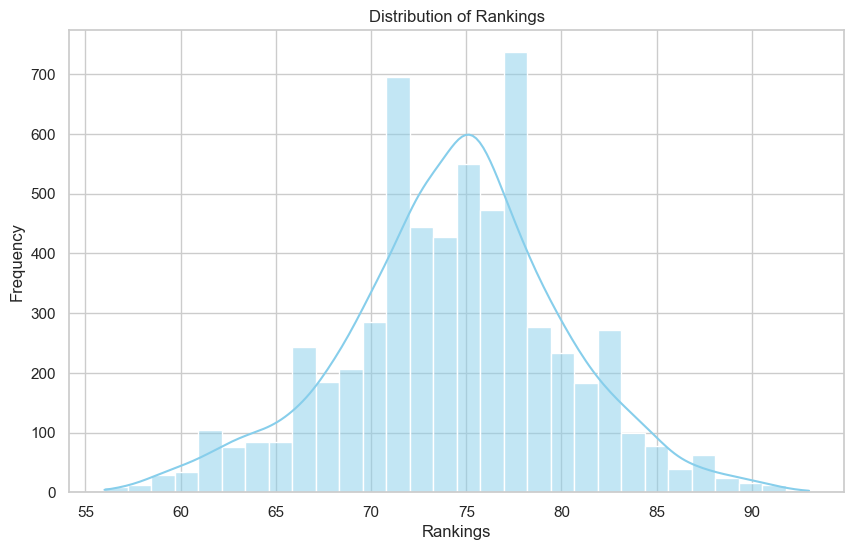

In [77]:
rankings = data['overall']

# style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(rankings, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rankings')
plt.xlabel('Rankings')
plt.ylabel('Frequency')
plt.show()

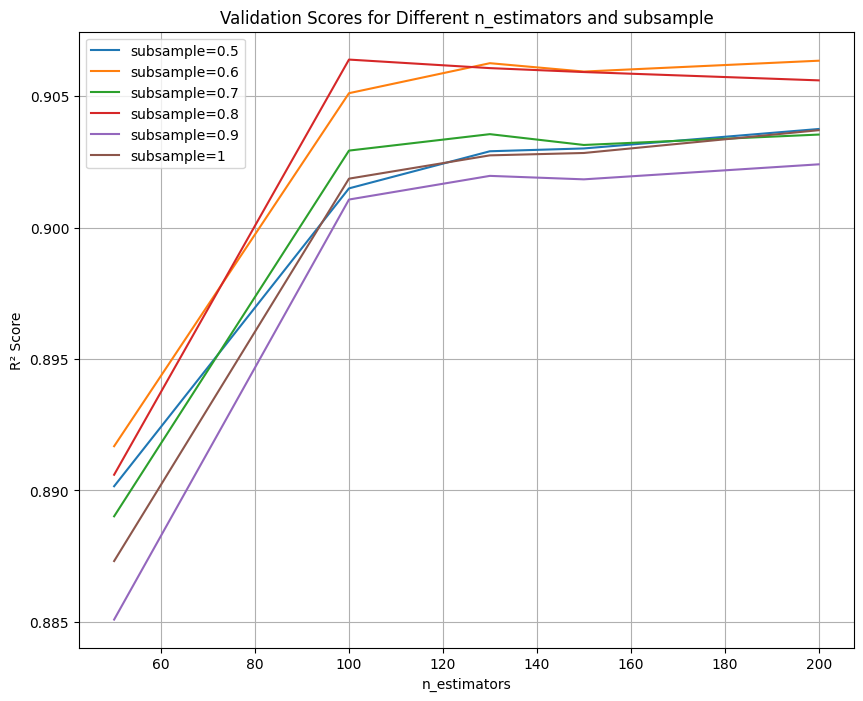

In [8]:
import matplotlib.pyplot as plt

# Adjusted parameter grid (excluding 1 for min_samples_split)
param_grid = {
    'n_estimators': [50, 100, 130, 150, 200],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Prepare the plot
plt.figure(figsize=(10, 8))
plt.title("Validation Scores for Different n_estimators and subsample")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.grid(True)

# Plotting a line for each min_samples_split value
for subsample in param_grid['subsample']:
    scores = []
    for n_estimators in param_grid['n_estimators']:
        model = XGBRegressor(objective ='reg:squarederror',
                             random_state=1,
                            eta=0.06,
                            max_depth=4)        
        model.set_params(subsample=subsample, n_estimators=n_estimators)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        scores.append(r2)
    plt.plot(param_grid['n_estimators'], scores, label=f'subsample={subsample}')

# Add legend
plt.legend()
plt.show()

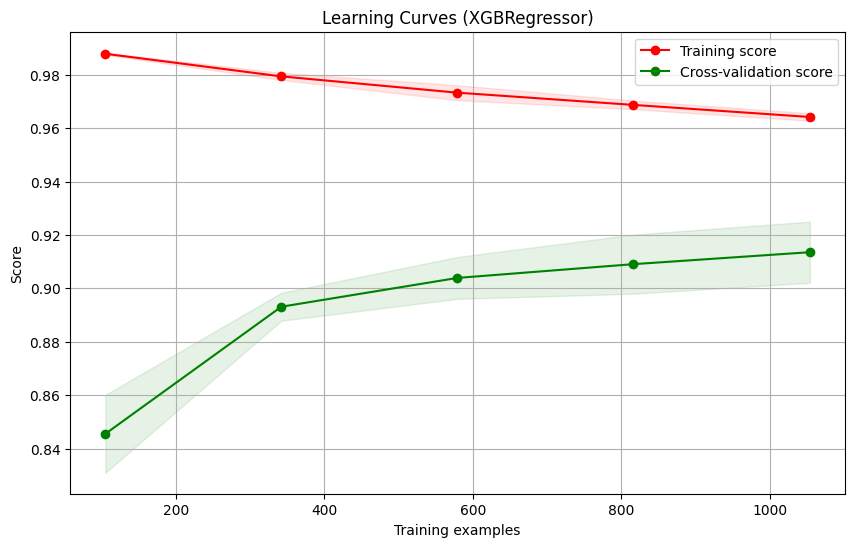

In [9]:
from sklearn.model_selection import learning_curve
import numpy as np

# Learning curve function
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot the learning curve
cv = 5  # Cross-validation splitting strategy
title = "Learning Curves (XGBRegressor)"
model = XGBRegressor(objective ='reg:squarederror',
                     random_state=1,
                     eta=0.06,
                     max_depth = 4,
                     subsample = 0.7,
                    n_estimators=130,
                    gamma = 1,
                     reg_alpha = 0,
                    min_child_weight=6)
#model = RandomForestRegressor(n_estimators=120, random_state=1)
plot_learning_curve(model, title, X_train_scaled, y_train, cv=cv, n_jobs=-1)
plt.show()

In [ ]:
!pip install keras==2.12.0
!pip install tensorflow==2.12.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=X_train_scaled.shape[1]),  # Adjust the input shape based on the number of features
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(16, activation='relu'),  # Hidden layer
    layers.Dense(1)  # Output layer for regression (no activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=32)
evaluation = model.evaluate(X_test_scaled, y_test_scaled)

print(f"Test Loss: {evaluation[0]}")
print(f"Mean Absolute Error: {evaluation[1]}")

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"R-squared (Coefficient of Determination): {r2}")

# Convert y_test and y_pred to pandas Series for easy handling
y_test_series = pd.Series(y_test.flatten(), name="Actual")
y_pred_series = pd.Series(y_pred.flatten(), name="Predicted")
results_df = pd.DataFrame({
    'Player': X_test.index,  # Assuming the player names are the index in X_test
    'Real Overall': y_test_series,
    'Predicted Overall': y_pred_series
})
# Create a DataFrame with actual and predicted values
#results_df = pd.concat([y_test_series, y_pred_series], axis=1)
pd.set_option('display.max_rows', None)
# Print the DataFrame
display(results_df.sort_values(by=["Real Overall"], ascending=False).iloc[:20] )

plt.figure(figsize=(10, 6))
plt.scatter(results_df['Predicted Overall'], results_df['Real Overall'], alpha=0.5)

# Adding the x = y line
plt.plot([results_df['Real Overall'].min(), results_df['Real Overall'].max()], 
         [results_df['Real Overall'].min(), results_df['Real Overall'].max()], 
         color='black', linestyle='--')

plt.title('Neural Network Predictions vs Real Values')
plt.xlabel('Predicted Overall')
plt.ylabel('Real Overall')
plt.grid(True)
plt.show()

In [ ]:
def create_model(neurons_1=64, neurons_2=32, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Input(shape=X_train_scaled.shape[1]),
        layers.Dense(neurons_1, activation=activation),
        layers.Dense(neurons_2, activation=activation),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

model = KerasRegressor(build_fn=create_model)

param_grid = {
    'neurons_1': [32, 64, 128],
    'neurons_2': [16, 32, 64],
    'activation': ['relu', 'tanh', 'elu'],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train_scaled)

print("Best Parameters: ", grid_result.best_params_)
print("Best Mean Absolute Error: ", -grid_result.best_score_)

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Mean: {-mean}, StdDev: {stdev}, Parameters: {param}")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

results = pd.DataFrame(grid_result.cv_results_)
results['param_neurons_1'] = results['params'].apply(lambda x: x['neurons_1'])
sns.lineplot(data=results, x='param_neurons_1', y='mean_test_score')
plt.title('MAE vs Number of Neurons in First Layer')
plt.xlabel('Number of Neurons in First Layer')
plt.ylabel('Mean Absolute Error')
plt.show()

from sklearn.metrics import r2_score

# Predict on the test set
y_pred = grid_result.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test_scaled, y_pred)
print("R2 Score: ", r2)

In [ ]:
import matplotlib.pyplot as plt

# Adjusted parameter grid (excluding 1 for min_samples_split)
param_grid = {
    'activation': ['relu', 'tanh', 'elu'],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
}

# Prepare the plot
plt.figure(figsize=(10, 8))
plt.title("Validation Scores for Different Activations and Optimizers")
plt.xlabel("Activation")
plt.ylabel("R² Score")
plt.grid(True)

# Plotting a line for each min_samples_split value
for optimizer in param_grid['optimizer']:
    scores = []
    for activation in param_grid['activation']:
      model = keras.Sequential([
          layers.Input(shape=X_train_scaled.shape[1]),  # Adjust the input shape based on the number of features
          layers.Dense(128, activation=activation),  # Hidden layer
          layers.Dense(16, activation=activation),  # Hidden layer
          layers.Dense(1)  # Output layer for regression (no activation)
      ])
      model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
      model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=32)
      #evaluation = model.evaluate(X_test_scaled, y_test_scaled)

      y_pred_scaled = model.predict(X_test_scaled)
      y_pred = scaler_y.inverse_transform(y_pred_scaled)

      # Calculate R-squared
      r2 = r2_score(y_test, y_pred)
      scores.append(r2)
    plt.plot(param_grid['activation'], scores, label=f'Optimizer={optimizer}')

# Add legend
plt.legend()
plt.show()